In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm
from sklearn.feature_selection import SelectPercentile, chi2


# Etapa 1

In [3]:
# carregamento de dados e metadados
data_ = pd.read_csv('gds5218.csv',sep=',', index_col = 0)
meta = pd.read_csv('meta-gds5218.csv',sep=',', index_col = 0)
list_of_column_names = list(data_.columns)

In [3]:
# verificaçao colunas e linhas de dados e metadados
print(data_.values.shape)
print(meta.values.shape)

(54675, 110)
(110, 5)


Análise de dados e metadados

Verifica-se que os dados são compostos por 54675 linhas e 110 colunas. Por outro lado, os metadados são compostos por 110 linhas e 5 colunas.

Assim, terá de se proceder à criação da matriz de dados transposta.

In [4]:
data=data_.transpose()

Descrição e caracterização do dataset

O objetivo do estudo era a análise de amostras de biópsia do músculo vasto lateral de adultos jovens (cerca de 24 anos) e idosos (cerca de 84 anos) antes e depois de 12 semanas de treino de resistência progressivo (extensões bilaterais de joelho, 3x10 reps, 3 vezes por semana, ou seja, 36 sessões). Os resultados fornecem informações sobre a adaptação molecular do músculo esquelético jovem e idosos ao treino de resistência.

Foram incluídos 28 indivíduos na investigação: Os jovens adultos eram 8 homens e 8 mulheres, os idosos eram 6 homens e 6 mulheres. As amostras foram retiradas antes da primeira sessão, 4h depois da primeira sessão, antes da última sessão e 4h depois da última sessão, resultando num total de 4 biópsias por indivíduo. 

#analisar melhor os dados

Quanto aos metadados, verifica-se que possuem 5 variáveis: a amostra, a categoria de idade do indivíduo (young ou old), o tipo de amostra retirada (antes da primeira sessão, 4hr depois da primeira sessão, antes da última sessão ou 4h depois da última sessão), o sexo do indivíduo e os valores para aquele determinado indivíduo.

## Missing values


In [5]:
# valores em falta nos dados 
print("Valores em falta para cada atributo dos dados:")
print(data.isnull().sum().sum())
print("")
print("Total de valores em falta nos dados:")
print(data.isnull().sum().sum())
data

Valores em falta para cada atributo dos dados:
0

Total de valores em falta nos dados:
0


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM702357,1161.83,1747.50,391.9700,129.942,6.23465,615.193,2213.73,83.6992,170.800,336.059,...,83673.3,71618.3,135710.0,113779.0,10.72420,5.34155,7.09508,42.67930,48.88130,8.89686
GSM702358,1071.50,1478.97,470.1980,162.253,30.24650,664.879,2801.26,93.1001,169.827,245.628,...,101759.0,83884.1,163462.0,137384.0,12.12390,49.66260,6.25664,3.44921,10.83010,35.67100
GSM702359,1957.93,3048.85,222.0020,303.021,11.29660,633.465,3521.90,203.3780,245.756,223.729,...,103741.0,85303.0,160178.0,139390.0,7.23681,44.22810,17.42500,42.60820,10.65350,9.60037
GSM702360,1631.58,2239.77,94.4564,163.405,19.58400,603.815,2183.40,176.1910,132.306,325.766,...,78205.1,64982.8,131370.0,112634.0,13.89620,4.99506,17.93520,18.57420,52.96540,6.04493
GSM702361,1257.48,1964.19,75.2555,194.749,8.09821,773.341,2014.83,129.8250,141.455,458.195,...,96081.1,81951.2,168932.0,162014.0,8.08048,53.30800,2.45023,36.68630,87.73750,29.03530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM702462,2389.90,1547.92,218.2720,139.022,9.99853,407.085,3920.48,91.2476,202.017,176.646,...,94439.2,81906.2,141688.0,123163.0,8.93783,3.34912,2.34650,14.56350,5.22898,25.05870
GSM702463,3292.27,1795.70,294.3510,207.317,4.39820,612.102,2573.11,367.3700,374.945,225.441,...,73592.2,65665.1,123681.0,102585.0,3.41522,29.14640,2.66657,21.66290,32.65540,6.98870
GSM702464,1810.30,1594.53,320.2300,169.438,3.36096,758.122,1728.08,121.9930,379.436,150.923,...,71730.8,62500.8,117189.0,103567.0,52.94770,5.54407,6.54492,10.45950,12.55890,14.87360
GSM702465,3016.57,1204.23,336.7170,139.851,42.15550,438.175,1905.68,208.5920,301.076,106.048,...,67826.3,59747.2,110544.0,91439.1,5.83766,11.57100,1.83166,20.09810,33.36150,22.91700


In [6]:
# valores em falta nos metadados 
print("Valores em falta para cada atributo dos metadados:")
print(meta.isnull().sum())
print("")
print("Total de valores em falta nos metadados:")
print(meta.isnull().sum().sum())
meta

Valores em falta para cada atributo dos metadados:
sample         0
age            0
time           0
gender         0
description    0
dtype: int64

Total de valores em falta nos metadados:
0


,sample,age,time,gender,description
GSM702357,GSM702357,young,baseline,male,Value for GSM702357: T1_Pre_Male_Young (81373)...
GSM702358,GSM702358,young,baseline,male,Value for GSM702358: T1_Pre_Male_Young (81379)...
GSM702359,GSM702359,young,baseline,male,Value for GSM702359: T1_Pre_Male_Young (81390)...
GSM702360,GSM702360,young,baseline,male,Value for GSM702360: T1_Pre_Male_Young (81412)...
GSM702361,GSM702361,young,baseline,male,Value for GSM702361: T1_Pre_Male_Young (81422)...
...,...,...,...,...,...
GSM702462,GSM702462,old,4 h after final session,female,Value for GSM702462: T4_Post_Female_Old (81383...
GSM702463,GSM702463,old,4 h after final session,female,Value for GSM702463: T4_Post_Female_Old (81402...
GSM702464,GSM702464,old,4 h after final session,female,Value for GSM702464: T4_Post_Female_Old (81426...
GSM702465,GSM702465,old,4 h after final session,female,Value for GSM702465: T4_Post_Female_Old (81440...


In [7]:
# verificaçao do tipo de atributos nos dados
print("Tipos de atributos (dados):")
print(data.dtypes)

Tipos de atributos (dados):
1007_s_at          float64
1053_at            float64
117_at             float64
121_at             float64
1255_g_at          float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54675, dtype: object


In [8]:
# verificaçao do tipo de atributos nos metadados
print("Tipos de atributos (metadados):")
print(meta.dtypes)

Tipos de atributos (metadados):
sample         object
age            object
time           object
gender         object
description    object
dtype: object


Características dos dados e metadados

Dados: Os atributos dos dados são os diferentes tipos de gene (como por exemplo: 1007_s_at, AFFX-ThrX-5_at). Há 54675 atributos e são do tipo float64.

Metadados: Os atributos dos metadados são a amostra, a categoria de idade do indivíduo (young ou old), o tipo de amostra retirada (antes da primeira sessão, 4hr depois da primeira sessão, antes da última sessão ou 4h depois da última sessão), o sexo do indivíduo e os valores par aquele determinado indivíduo. Estes atributos são do tipo object.

Passos do pré-processamento

Caso houvessem valores nulos procederia-se à eliminação destes usando a função dropna. Como não há, procede-se à normalização dos dados com o algoritmo preprocessing.scale(). 

In [6]:
data_scale = preprocessing.scale(data)
data_scale.shape

(110, 54675)

Escolha de variáveis de meta-dados

#Aqui temos que escolher os que acharmos mais relevantes

In [11]:
descricao=data.describe()
descricao


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,2110.879155,1691.253064,261.612032,164.555415,18.025280,589.587155,2795.621182,175.361365,196.294379,235.096968,...,86004.432727,73548.030909,139947.746364,121380.306364,11.038309,26.311358,8.979094,21.512623,30.756433,15.349617
std,645.625411,364.608314,110.024959,69.971940,17.390727,243.810571,783.409772,56.960527,113.314636,98.284531,...,12553.309983,10392.407290,20739.224076,23133.881202,9.800978,20.813101,7.856323,14.744102,20.325383,15.334459
min,880.367000,962.718000,75.255500,11.453300,1.758700,238.332000,1222.330000,33.471100,9.230840,69.887800,...,55124.800000,45965.200000,97299.100000,69313.700000,2.461270,3.349120,1.211720,1.860940,2.561100,2.084160
25%,1642.670000,1482.510000,190.303750,129.998250,5.711068,442.909000,2209.162500,142.821000,120.408750,159.664500,...,76674.950000,65176.925000,124404.500000,104064.500000,5.813022,9.823560,4.082002,9.009625,12.354075,5.760337
50%,2017.640000,1639.010000,239.715500,160.294000,9.532800,529.382000,2640.330000,170.109000,177.050500,213.295500,...,84517.200000,72891.300000,136396.000000,116431.500000,8.748015,21.568000,6.538035,20.063300,30.897850,7.668280
75%,2532.260000,1803.905000,309.892250,207.208750,30.550025,670.007750,3270.390000,206.644000,235.008250,305.806750,...,94106.250000,81006.800000,152469.500000,135547.250000,12.095950,38.761225,10.374825,32.710375,42.821325,19.602225
max,3933.020000,3048.850000,619.877000,378.568000,84.943600,2132.360000,5002.980000,367.370000,709.760000,494.081000,...,125391.000000,107061.000000,209777.000000,215554.000000,55.617600,85.342000,39.715800,72.645400,87.737500,80.119600


## Exploraçao Grafica



In [12]:
meta.groupby("gender").size()

gender
female    54
male      56
dtype: int64

In [13]:
meta.groupby("age").size()

age
old      48
young    62
dtype: int64

<Axes: >

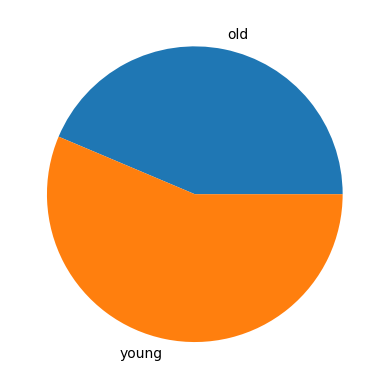

In [14]:
meta.groupby("age").size().plot.pie()

<Axes: >

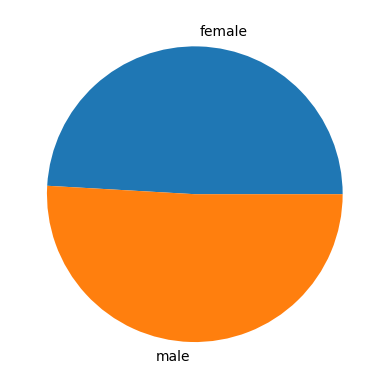

In [15]:
meta.groupby("gender").size().plot.pie()

# Analise da estatistica univariada e filtros

In [12]:
print(data.values)
data.iloc[:,1:].shape

[[1161.83    1747.5      391.97    ...   42.6793    48.8813     8.89686]
 [1071.5     1478.97     470.198   ...    3.44921   10.8301    35.671  ]
 [1957.93    3048.85     222.002   ...   42.6082    10.6535     9.60037]
 ...
 [1810.3     1594.53     320.23    ...   10.4595    12.5589    14.8736 ]
 [3016.57    1204.23     336.717   ...   20.0981    33.3615    22.917  ]
 [2670.62    1889.21     328.044   ...   26.3532     8.08511    5.63957]]


(110, 54674)

### Analise de Variabilidade

 Conforme o dataset escolhido e tendo por base os teste estatisticos univariados, optamos por realizar o método  SelectBest que trata os dados com maior relevância, para efetuar avaliaçoes de cada recurso (neste caso, de cada coluna correspondente a um gene).


In [11]:
skb=SelectPercentile(chi2, percentile=1)

#labels.shape
x_kbest = skb.fit_transform(data.iloc[:,1:], list_of_column_names)

columns_best = data[skb.get_feature_names_out()]
data_kbest = pd.DataFrame(data=x_kbest, index=data.index, columns=columns_best.columns)
print(data_kbest.shape)
data_kbest






(110, 547)


,1552402_at,1552731_at,1552732_at,1552791_a_at,1553538_s_at,1553567_s_at,1553569_at,1553570_x_at,1553873_at,1553946_at,...,AFFX-CreX-5_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-hum_alu_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
GSM702357,3718.95,4402.63,21468.9,12023.30,82928.4,37874.9,83301.4,92136.1,6183.79,8.37554,...,124184.0,83301.7,76078.0,8617.22,3277.43,51878.8,79785.2,83673.3,135710.0,113779.0
GSM702358,1129.39,9453.31,32434.9,9738.50,91617.9,47215.9,95136.8,100363.0,5173.35,7.40650,...,150911.0,94590.0,85581.9,6398.89,2527.64,61880.9,91734.3,101759.0,163462.0,137384.0
GSM702359,5141.88,18057.60,25246.2,1519.59,95655.2,58268.1,108117.0,115803.0,4710.97,4617.30000,...,156740.0,119995.0,101065.0,4883.48,1203.70,65991.2,105596.0,103741.0,160178.0,139390.0
GSM702360,4290.54,3906.00,11292.4,4892.47,71006.9,35128.4,87043.9,88341.5,4731.49,72.62280,...,121504.0,88022.2,82597.8,5569.66,2377.07,64436.1,78768.0,78205.1,131370.0,112634.0
GSM702361,5076.17,5157.94,15301.4,6380.96,82780.8,34107.6,105567.0,109218.0,3834.37,6.56226,...,162475.0,102298.0,105435.0,5555.39,2391.66,75476.3,96056.4,96081.1,168932.0,162014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM702462,8157.61,16983.30,49132.2,5115.97,84230.2,43376.6,85199.6,92397.9,10652.90,72.25870,...,133056.0,89855.1,79620.8,6068.34,2372.30,57396.7,83437.3,94439.2,141688.0,123163.0
GSM702463,8072.33,12140.30,32003.9,8279.43,68528.6,28216.1,75990.6,79267.3,7535.87,4.49469,...,113951.0,76149.5,67971.2,6697.64,2056.16,48579.6,70516.3,73592.2,123681.0,102585.0
GSM702464,15091.30,14720.20,36586.8,5486.12,63119.9,32078.1,84572.7,92483.1,3409.25,5.98835,...,112413.0,82806.5,75507.2,5405.96,2859.09,52078.4,78601.6,71730.8,117189.0,103567.0
GSM702465,5986.88,13696.50,39981.3,11677.10,58553.9,27659.6,64159.3,70276.5,7376.53,3.12992,...,101515.0,55442.3,59082.1,6676.63,2234.62,38706.0,63549.7,67826.3,110544.0,91439.1


## Estapa 2:


In [11]:
print("Average: ", data_scale.mean())
print("Standard Deviation: ", data_scale.std())

Average:  -9.00428392666684e-18
Standard Deviation:  0.9999999999999998


Explained Variance: [0.390065   0.10324616 0.09182137 0.05438338 0.03700314 0.03356529
 0.02519117 0.02271747 0.021522   0.01732458 0.01354148 0.01162578
 0.01081914 0.00992847 0.00928128 0.00870129 0.00788299 0.00705811
 0.00628254 0.00609908]


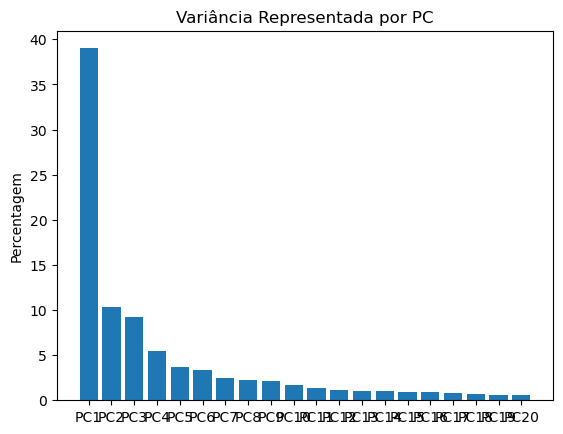

In [13]:
pca = PCA(n_components=20)
X_r = pca.fit(data_kbest).transform(data_kbest)

print('Explained Variance: %s'% str(pca.explained_variance_ratio_))

pca.explained_variance_ratio_.sum()
dados=pd.DataFrame(data_kbest)
x_pca = pca.transform(dados)

plt.bar(range(20), pca.explained_variance_ratio_*100)
plt.xticks(range(20), ['PC'+str(i) for i in range(1,20+1)])
plt.title("Variância Representada por PC")
plt.ylabel("Percentagem")
plt.show()

['young' 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young'
 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young'
 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young'
 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young'
 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young'
 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young'
 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'young' 'old'
 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old'
 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old'
 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old'
 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old' 'old']
young
old


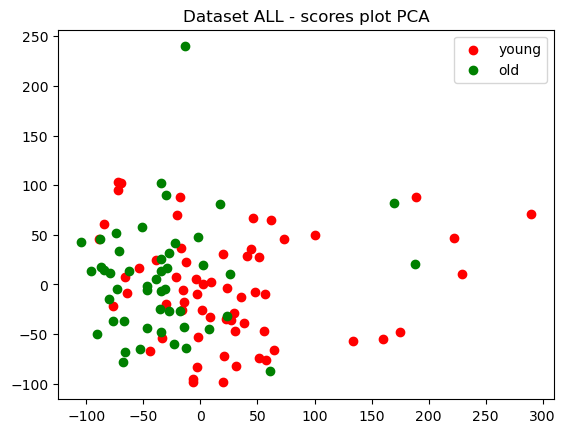

In [19]:
output_data=meta.values[:,1]
plt.figure()
for c, name in zip("rgb", ["young", "old"]):
    plt.scatter(X_r[output_data == name, 0], X_r[output_data == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

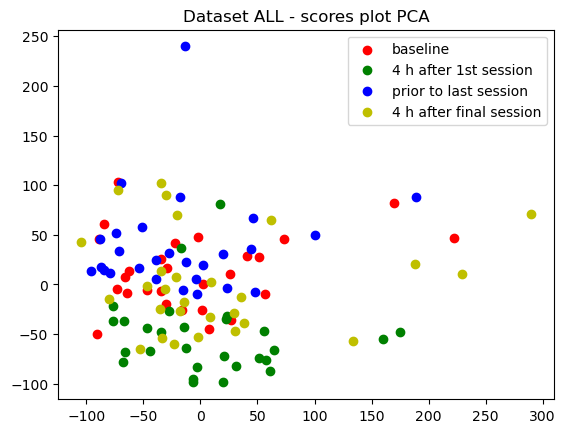

In [22]:
output_data=meta.values[:,2]
plt.figure()
for c, name in zip("rgby", ["baseline", "4 h after 1st session","prior to last session","4 h after final session"]):
    plt.scatter(X_r[output_data == name, 0], X_r[output_data == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

[1.00700761e-01 5.54195024e-02 5.19314286e-02 3.83889783e-02
 3.23023253e-02 2.58356268e-02 2.45452906e-02 1.84238773e-02
 1.63189303e-02 1.44999435e-02 1.36118354e-02 1.29493118e-02
 1.20252991e-02 1.16236724e-02 1.12232760e-02 1.07904396e-02
 1.03973962e-02 1.00374710e-02 9.84668221e-03 9.63997864e-03
 9.44416131e-03 9.08916352e-03 8.97877482e-03 8.70587131e-03
 8.51975112e-03 8.41414815e-03 8.17530708e-03 8.09932017e-03
 7.96471481e-03 7.86654654e-03 7.68175775e-03 7.62211687e-03
 7.50678787e-03 7.45544323e-03 7.30759051e-03 7.19203012e-03
 7.17466583e-03 7.03089453e-03 7.00045814e-03 6.95005258e-03
 6.78735746e-03 6.77531672e-03 6.65701120e-03 6.53891265e-03
 6.48148973e-03 6.45327020e-03 6.39777948e-03 6.34831618e-03
 6.28127414e-03 6.22990421e-03 6.18420671e-03 6.15179566e-03
 6.05270072e-03 5.96138004e-03 5.87474231e-03 5.80415397e-03
 5.76402603e-03 5.71129548e-03 5.65671167e-03 5.64059714e-03
 5.56869486e-03 5.55114330e-03 5.48476478e-03 5.44543006e-03
 5.43160305e-03 5.392895

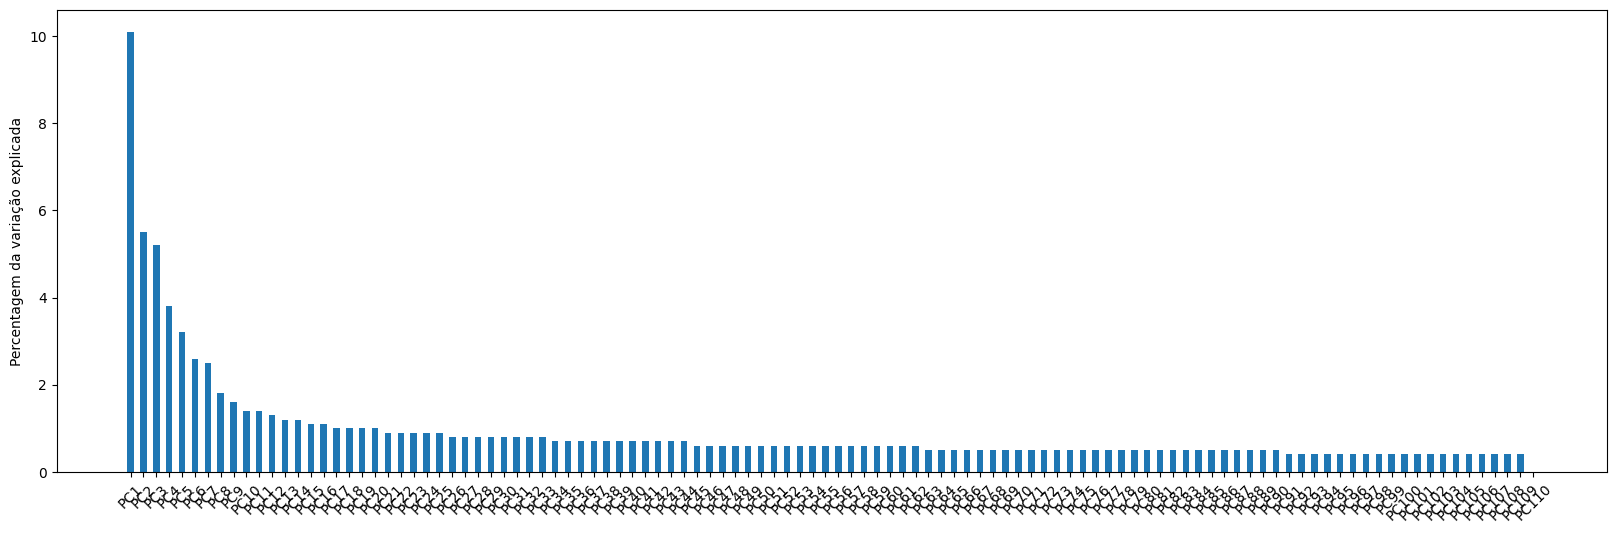

In [ ]:
n=110 ; #110 colunas do dataset, pk?                                                               
pca = PCA(n_components=n)  # PCA é uma classe do SKlearn
x_reduced = pca.fit(data_scale).transform(data_scale)  # data_scale -- dados normalizados  fit ajusta o modelo aos lados; aplica a pac para reduzir o conjunto de dados                   # escala
print (pca.explained_variance_ratio_) # 
print(pca.explained_variance_ratio_[:88].sum())                          # 90% da variabilidade

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=["PC"+str(x) for x in range(1,len(per_var)+1)]                  
plt.figure(figsize=(20, 6))  # width:20, height:3

plt.bar([x*2 for x in range(1,len(per_var)+1)], height=per_var, align="center", width=1)
plt.ylabel("Percentagem da variação explicada")
plt.xticks([x*2 for x in range(1,len(per_var)+1)], labels, rotation=45)

    
plt.show()

